<a href="https://colab.research.google.com/github/seupedro7/Trainee-CIS/blob/main/Pedro_Oliveira_Trainee_CIS_2_Semana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Treinamento CIS - 2º Período
Para a segunda etapa, iremos realizar análises mais avançadas de dados, incluindo conceitos como PCA, Clustering entre outros.
Para isso, decide por outro dataset com dados mais interessantes para estas análises, o dataset é o genres, que possui dados das musicas do Spotify com variaveis interessantes. Ele veio do Kaggle e pode ser acessado pelo link "https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify"

In [2]:
import seaborn as sns 
import statistics as stat
import string as st
import pandas as pd 
import numpy as np  
import matplotlib as mat
import matplotlib.pyplot as plt

import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
from google.colab import files
up = files.upload()

Saving genres_v2.csv to genres_v2.csv


In [4]:
df=pd.read_csv('genres_v2.csv')


df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


#Pré-processamento e representação dos dados

In [5]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

Vemos que apenas as colunas 'song_name','Unnamed: 0'e'title' possuem valores nulos, como essas colunas possuem dados nominais que não seram relevantes para as análises posteriores, vamos deleta-las para facilitar as análises.
Além disso, vamos deletar também as colunas 'type','id','uri','track_href'e'	analysis_url' por também não possuirem dados interessantes para nós.

In [6]:
df=df.drop(columns=['song_name','Unnamed: 0','title','type','id','uri','track_href','analysis_url'])
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


Agora podemos analisar os dados validos de formas separadas, para começar, os dados nominais e ordinais.
Para os dados nominais temos os generos musicais presentes no dataset através da coluna 'genre'.
E para os dados ordinais, temos alguns exemplos no dataset, optei por observar a coluna 'time_signature' que mostra o tempo musical.

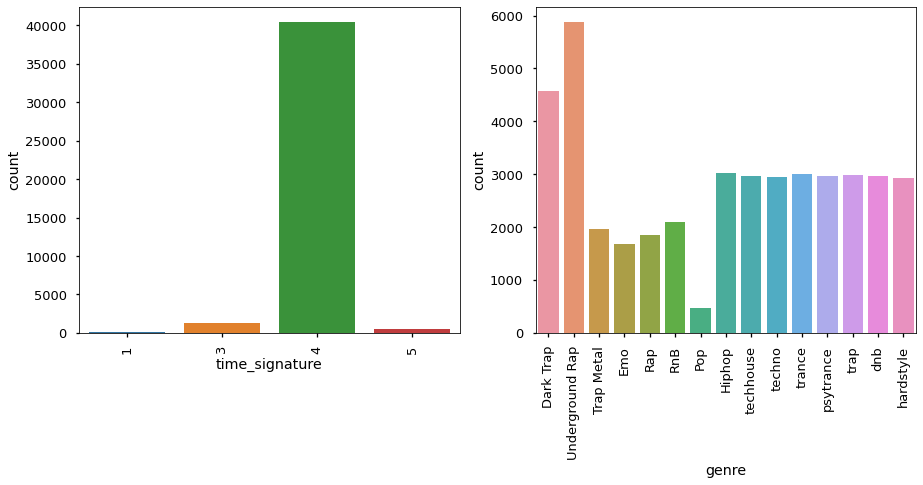

In [7]:
cc = ['time_signature', 'genre']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axs = np.ravel(axs)

for i, col in enumerate(cc):
    plt.sca(axs[i])
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)

plt.show()

A melhor forma de análisar esses dados é por graficos de barras. Vemos no grafico da direita que o gênero Undergroud Rap é o mais presente no dataset, e no grafico da esquerda vemos que a grande maioria das musicas é em 4/4, o que não surpreende considerando que esse é o tempo musical de aprox. 95% das musicas na história.

Agora podemos pensar nos dados numéricos, uma análise interessante a ser feita é a "dançabilidade" por gênero musical, considerando que temos a coluna 'danceability' que é um Ratio Data numérico. Para observar quais generos são mais dançantes que outros, iremos montar um boxplot. 


In [8]:
def plot_genre_horizontal_bar(col, title=None):
    data = df.groupby('genre')[col].mean().sort_values()

    cmap = plt.cm.coolwarm_r
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    colors = [cmap(norm(value)) for value in data]

    data.plot.barh(color=colors)
    plt.xlabel(col)
    plt.title(title, fontdict={'size': 18, 'color': '#de5d83'})
    plt.show()


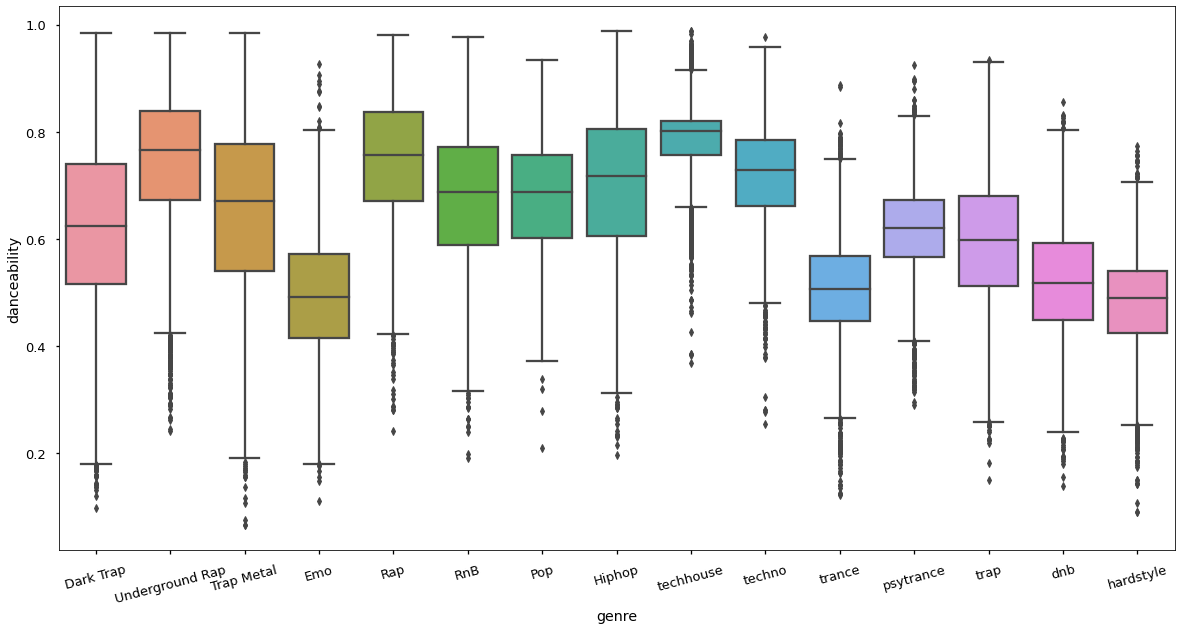

In [10]:
    sns.boxplot(data=df, x='genre', y='danceability')
plt.xticks(rotation=15)
plt.rcParams['figure.figsize']=(20,10)
plt.show()

Interessante notar a presença de outliers nos graficos, mas como danceability é um conceito que varia muito a depender da musica, não é estranho.

#Redução de dimensionalidade

In [12]:

df = df.drop_duplicates()
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,38125.000000,38125.000000,38125.000000,38125.000000,38125.000000,38125.000000,38125.000000,38125.000000,38125.000000,38125.000000,38125.000000,38125.000000,38125.000000
mean,0.642845,0.751433,5.349298,-6.610851,0.552289,0.139056,0.102980,0.274937,0.212719,0.359525,147.671056,248702.991843,3.971620
std,0.155872,0.185661,3.665248,2.937788,0.497265,0.127392,0.176340,0.369936,0.174188,0.232538,24.359260,103493.866908,0.275294
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.529000,0.618000,1.000000,-8.288000,0.000000,0.049200,0.001960,0.000000,0.099900,0.164000,129.949000,176591.000000,4.000000
50%,0.650000,0.787000,6.000000,-6.352000,1.000000,0.077400,0.019400,0.002920,0.134000,0.326000,144.822000,222898.000000,4.000000
75%,0.768000,0.914000,8.000000,-4.670000,1.000000,0.201000,0.121000,0.711000,0.291000,0.525000,163.071000,298462.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


#Clustering

Utilizaremos uma analise de clustering através do algoritmo K-Means para prever o genero musical através dos outros dados

In [16]:
df2 = df._get_numeric_data()
df2.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [33]:
kmeans = KMeans(n_clusters = 15, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df2)
df['kclasse']=pred_y


Após agrupar os clusters, iremos comparar os resultados dos clusters com os generos iniciais atráves de graficos.

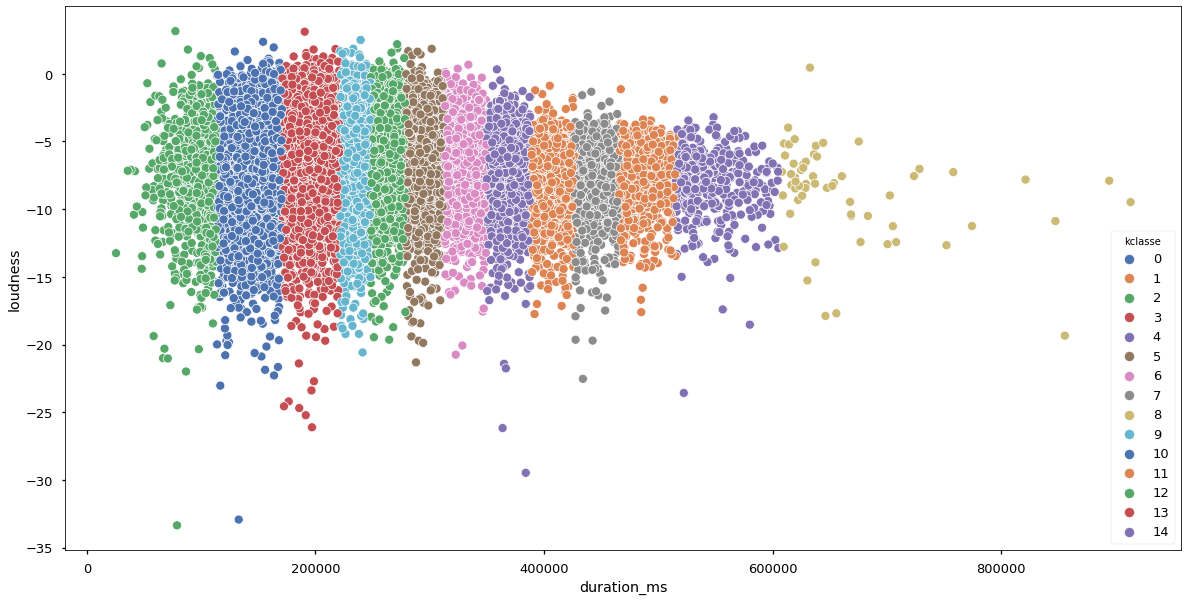

In [39]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'duration_ms',y = 'loudness', data = df, hue = 'kclasse',palette='deep')
plt.show()
#grafico de duraçaõ e barulho das musicas separadas por cluster

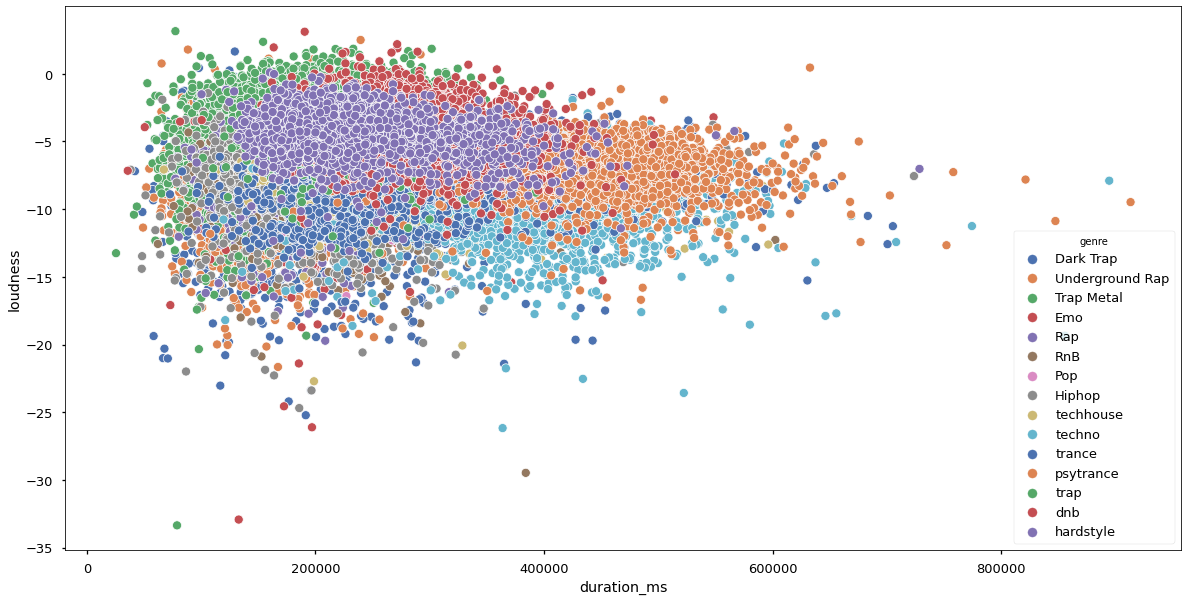

In [40]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'duration_ms',y = 'loudness', data = df, hue = 'genre',palette='deep')
plt.show()
#grafico de duraçaõ e barulho das musicas separadas por genêro

Vemos que os resultados estão bem diferentes do desejado, provavelmente a duração das musicas afetou o clustering por possuir uma escala bem maior do que os outros dados, iremos corrigir isso na proxima etapa junto com a análise de PCA.

#PCA
A proxima análise será de PCA, para isso precisamos organizar os dados inicialmente e então reduzimos sua dimensionalidade em componentes principais

In [46]:
from sklearn.decomposition import PCA
df2=df2.drop(columns=['key','mode','tempo','time_signature']) #deleto as colunas com dados ordinais
df2.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
0,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,124539
1,0.719,0.493,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,224427
2,0.850,0.893,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,98821
3,0.476,0.781,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,123661
4,0.798,0.624,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,123298


In [62]:

from sklearn.preprocessing import StandardScaler 
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df2.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','duration_ms'])
 
df_scaled.describe()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
count,3.812500e+04,3.812500e+04,3.812500e+04,3.812500e+04,3.812500e+04,3.812500e+04,3.812500e+04,3.812500e+04,3.812500e+04
mean,-2.812526e-16,-2.699690e-15,-5.074615e-16,-9.494074e-16,1.396403e-15,-3.423004e-14,-8.352209e-15,-1.704662e-16,-3.006979e-15
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-3.706594e+00,-4.046077e+00,-9.104299e+00,-9.133828e-01,-5.839863e-01,-7.432124e-01,-1.159789e+00,-1.465690e+00,-2.155740e+00
25%,-7.303865e-01,-7.186999e-01,-5.708958e-01,-7.053614e-01,-5.728773e-01,-7.432124e-01,-6.476927e-01,-8.408385e-01,-6.967846e-01
50%,4.590382e-02,1.915719e-01,8.811205e-02,-4.839951e-01,-4.739761e-01,-7.353190e-01,-4.519249e-01,-1.441701e-01,-2.493416e-01
75%,8.029473e-01,8.756223e-01,6.606592e-01,4.862484e-01,1.021913e-01,1.178769e+00,4.494106e-01,7.116138e-01,4.807982e-01
max,2.214384e+00,1.338838e+00,3.321880e+00,6.334399e+00,5.018896e+00,1.930261e+00,4.450881e+00,2.702709e+00,6.419296e+00


Agora os dados em df_scaled estão em escala, com média 0 e desvio padrão 1. Podemos então executar o PCA. Reduziremos nosso dataset para 5 componentes principais.

In [57]:
pca = PCA(n_components=5)
pca.fit(df_scaled)


PCA(n_components=5)

In [58]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.28881754 0.20066488 0.13539704 0.10033729 0.08088425]
[314.80235042 262.39881455 215.54143209 185.54846352 166.59353986]


Aqui podemos ver a variancia explicada de cada um dos componentes principais e seus valores. Reduzimos a dimensionalidade do nosso dataframe de 9 para 5 componentes principais.

In [60]:
kmeans = KMeans(n_clusters = 15, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_scaled)
df['kclasse']=pred_y

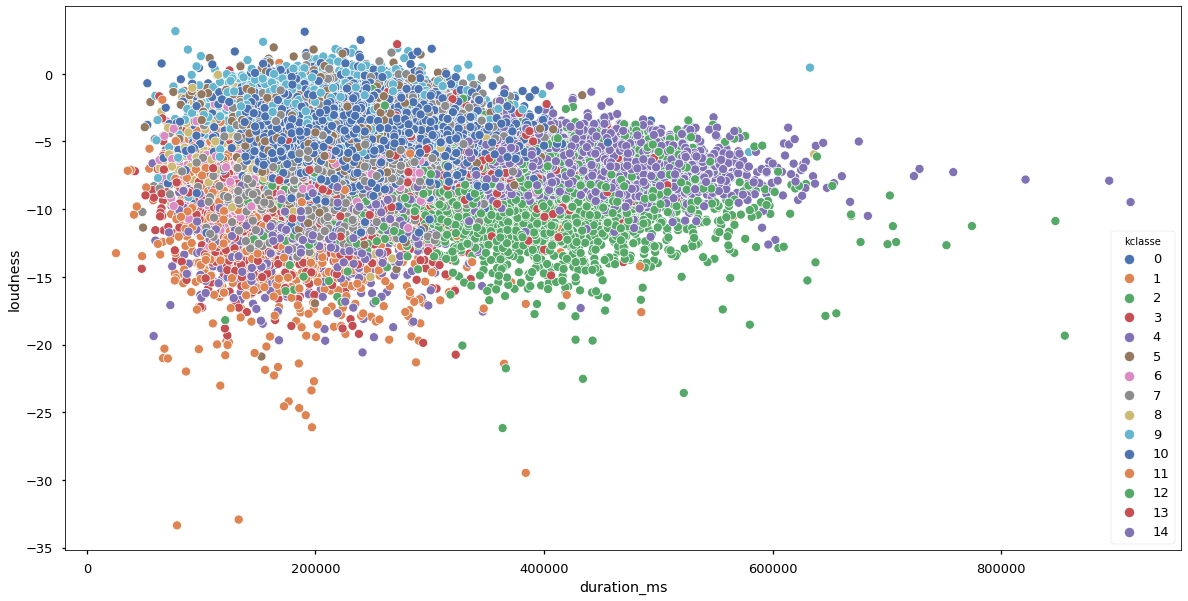

In [61]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'duration_ms',y = 'loudness', data = df, hue = 'kclasse',palette='deep')
plt.show()

É interessante notar que se realizarmos clustering com o dataframe em escala, o resultado é mais próximo do desejado, pois agora temos todo o dataframe numa mesma escala.

##Treinamento x Validação


In [65]:
df_scaled['genre'] = df['genre']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_scaled['genre_c'] = le.fit_transform(df_scaled['genre'])
df_scaled.head() 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,genre,genre_c
0,1.207131,0.337000,-0.256369,2.205369,-0.244870,-0.706989,-0.902019,0.126756,-1.199739,Dark Trap,0
1,0.488582,-1.391978,-0.210756,-0.468295,1.690055,-0.743212,-0.543781,-1.012855,-0.234568,Dark Trap,0
2,1.329028,0.762512,0.622194,-0.602528,-0.505733,-0.743201,0.914431,-1.377961,-1.448240,Dark Trap,0
3,-1.070415,0.159255,0.647043,-0.283039,-0.449591,-0.743212,-0.566745,-0.793534,-1.208223,Dark Trap,0
4,0.995416,-0.686383,-0.359850,1.208436,0.646602,-0.743212,-0.268213,0.995442,-1.211730,Dark Trap,0


In [67]:
X = df_scaled[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',  'duration_ms']]

y = df_scaled[['genre_c']]

features = ['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence','duration_ms' ]
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
0,1.207131,0.337000,-0.256369,2.205369,-0.244870,-0.706989,-0.902019,0.126756,-1.199739
1,0.488582,-1.391978,-0.210756,-0.468295,1.690055,-0.743212,-0.543781,-1.012855,-0.234568
2,1.329028,0.762512,0.622194,-0.602528,-0.505733,-0.743201,0.914431,-1.377961,-1.448240
3,-1.070415,0.159255,0.647043,-0.283039,-0.449591,-0.743212,-0.566745,-0.793534,-1.208223
4,0.995416,-0.686383,-0.359850,1.208436,0.646602,-0.743212,-0.268213,0.995442,-1.211730


Separamos nosso dataframe em X e Y, sendo y o genero musical em forma de dados ordinais(0 à 15) e X os nossos dados gerais, e agora vamos separar em X e Y de treinamento e validação utilizando o algoritmo train_test_split.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train ,y_test = train_test_split(X,y,random_state =0)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
count,28593.000000,28593.000000,28593.000000,28593.000000,28593.000000,28593.000000,28593.000000,28593.000000,28593.000000
mean,-0.002376,-0.002882,-0.000034,0.001217,0.000933,-0.005252,-0.002404,0.005270,0.000182
std,1.000339,0.999414,0.998513,1.003199,1.001030,0.998439,0.997474,1.000919,0.999926
min,-3.706594,-4.046077,-8.958609,-0.913383,-0.583986,-0.743212,-1.159789,-1.461819,-2.155740
25%,-0.730387,-0.724086,-0.572257,-0.705361,-0.572934,-0.743212,-0.647119,-0.836538,-0.696736
50%,0.045904,0.186186,0.089814,-0.483210,-0.473976,-0.736049,-0.451925,-0.135569,-0.247709
75%,0.802947,0.875622,0.661680,0.486248,0.102191,1.167956,0.443670,0.724515,0.480895
max,2.214384,1.338838,3.321880,6.334399,5.018896,1.930261,4.450881,2.668306,6.419296


In [73]:
X_train.shape , y_train.shape

((28593, 9), (28593, 1))

In [74]:
X_test.shape , y_test.shape

((9532, 9), (9532, 1))

Podemos ver que uma parte grande(28593 musicas) estão no dataframe de treinamento, as outras serão utilizadas para validação do modelo de machine learning.

##Regressão Linear

In [76]:
from sklearn import linear_model #função para regressão linear
from sklearn.metrics import mean_squared_error, r2_score #funções para avaliar a performance da regressão linear

In [77]:
linear = linear_model.LinearRegression()

In [80]:
linear.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = linear.predict(X_test)

Teste de performance da regressão linear:

In [93]:
print('Coeficientes:', linear.coef_)
print('Intercept:', linear.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coeficiente de determinação (R^2): %.2f'
      % r2_score(y_test, y_pred))



Coeficientes: [[ 0.21938952  1.18664101  0.17414126  0.04592842 -0.2975992   0.72701489
   0.12090495 -0.53090792  1.07940053]]
Intercept: [7.11289795]
Mean squared error (MSE): 13.04
Coeficiente de determinação (R^2): 0.34


Os coeficientes são os pesos de cada atributo, o resultado final é dado por cada valor multiplicado por seu peso e no fim somado ao valor de intercept.
O erro foi de 13.04% e o coeficiente de determinação foi de 0.34.

##Regressão Logistica

In [88]:
accuracy = [['model','accuracy']]

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [90]:
yhat = model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score

accuracy.append(['LogisticRegression', accuracy_score(y_test , yhat, normalize =True)])
accuracy_score(y_test , yhat, normalize =True)

0.3875367184221569

Para o modelo de regressão logistica, obtemos uma performance de 0.38%, melhor do que a da regressão linear porêm ainda é ruim.